<a href="https://colab.research.google.com/github/semaHbo/ev-enerji-tahmini/blob/main/Model_Training/Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive

drive.mount('/content/drive')
train_path = '/content/drive/MyDrive/ev-enerji-tahmini/train1_scaled_cleaned.csv'
val_path = '/content/drive/MyDrive/ev-enerji-tahmini/val1_scaled_cleaned.csv'

train_df = pd.read_csv(train_path, index_col='date', parse_dates=True)
val_df = pd.read_csv(val_path, index_col='date', parse_dates=True)

X_train = train_df.drop(columns=['Enerji_Tuketimi'])
y_train = train_df['Enerji_Tuketimi']
X_val = val_df.drop(columns=['Enerji_Tuketimi'])
y_val = val_df['Enerji_Tuketimi']

# oluşturma
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# eğitme
rf_model.fit(X_train, y_train)

# tahmin
y_pred = rf_model.predict(X_val)

mae = mean_absolute_error(y_val, y_pred)
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_val, y_pred)

print("Random Forest Performansı ")
print(f"MAE  : {mae:.4f}")
print(f"MSE  : {mse:.4f}")
print(f"RMSE : {rmse:.4f}")
print(f"R²   : {r2:.4f}")


Mounted at /content/drive
Random Forest Performansı 
MAE  : 58.9240
MSE  : 10017.7387
RMSE : 100.0887
R²   : 0.0054


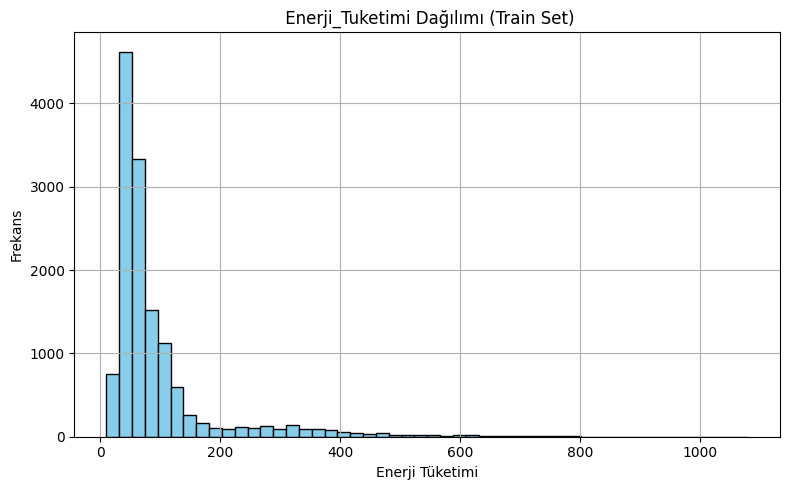

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.hist(y_train, bins=50, color='skyblue', edgecolor='black')
plt.title(" Enerji_Tuketimi Dağılımı (Train Set)")
plt.xlabel("Enerji Tüketimi")
plt.ylabel("Frekans")
plt.grid(True)
plt.tight_layout()
plt.show()


Model iyi sonuclar vermiyor log dönüsümü yapilacak

In [ ]:
# Log dönüşümü
y_train_log = np.log1p(y_train)
y_val_log = np.log1p(y_val)


In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_log_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_log_model.fit(X_train, y_train_log)

# Tahmin
y_pred_log = rf_log_model.predict(X_val)


In [ ]:
# Tahminlerin eski hali
y_pred = np.expm1(y_pred_log)
y_val_real = np.expm1(y_val_log)


In [ ]:
mae = mean_absolute_error(y_val_real, y_pred)
mse = mean_squared_error(y_val_real, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_val_real, y_pred)

print(" Random Forest Log dönüşümlü")
print(f"MAE  : {mae:.4f}")
print(f"MSE  : {mse:.4f}")
print(f"RMSE : {rmse:.4f}")
print(f"R²   : {r2:.4f}")


 Random Forest Log dönüşümlü
MAE  : 46.0212
MSE  : 9524.9910
RMSE : 97.5961
R²   : 0.0544


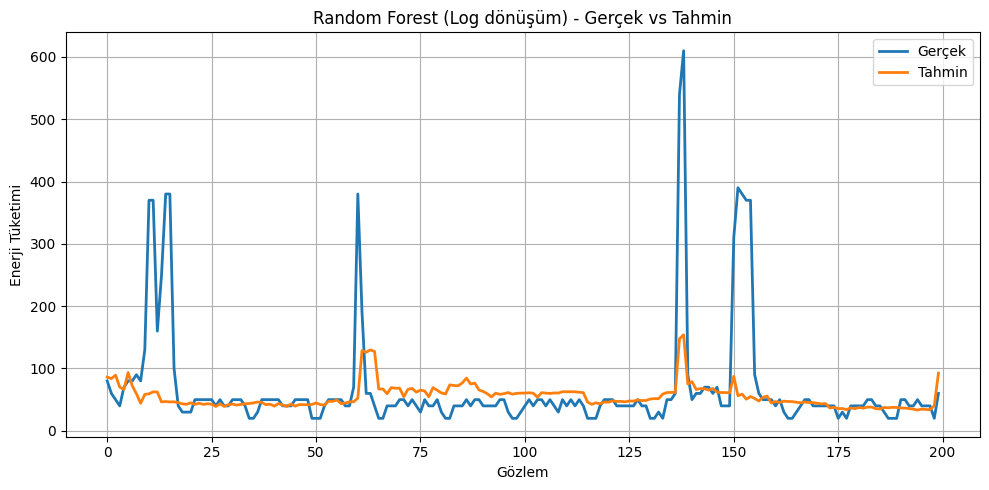

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(y_val_real.values[:200], label="Gerçek", linewidth=2)
plt.plot(y_pred[:200], label="Tahmin", linewidth=2)
plt.title("Random Forest (Log dönüşüm) - Gerçek vs Tahmin")
plt.xlabel("Gözlem")
plt.ylabel("Enerji Tüketimi")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Log sayesinde biraz iyilesme oldu

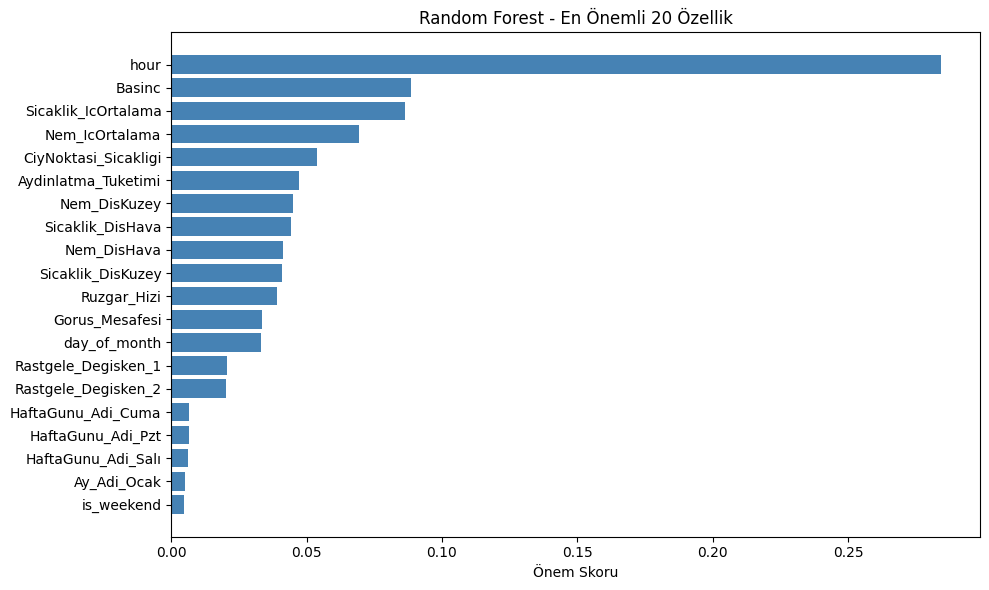

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

feature_names = X_train.columns

# Özellik önemleri
importances = rf_log_model.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'][:20][::-1], feature_importance_df['Importance'][:20][::-1], color='steelblue')
plt.title('Random Forest - En Önemli 20 Özellik')
plt.xlabel('Önem Skoru')
plt.tight_layout()
plt.show()


In [ ]:
feature_importance_df


,Feature,Importance
13,hour,0.284529
4,Basinc,0.088400
11,Sicaklik_IcOrtalama,0.086216
12,Nem_IcOrtalama,0.069488
8,CiyNoktasi_Sicakligi,0.054030
0,Aydinlatma_Tuketimi,0.047082
2,Nem_DisKuzey,0.045090
3,Sicaklik_DisHava,0.044148
5,Nem_DisHava,0.041107
1,Sicaklik_DisKuzey,0.041098


In [ ]:
silinecekler = [
    'HaftaGunu_Adi_Pzt', 'HaftaGunu_Adi_Salı', 'HaftaGunu_Adi_Cuma',
    'Ay_Adi_Ocak', 'is_weekend',
    'Rastgele_Degisken_1', 'Rastgele_Degisken_2'
]


In [ ]:
X_train_sade = X_train.drop(columns=silinecekler, errors='ignore')
X_val_sade = X_val.drop(columns=silinecekler, errors='ignore')


In [ ]:
rf_sade_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_sade_model.fit(X_train_sade, y_train_log)

y_pred_log_sade = rf_sade_model.predict(X_val_sade)
y_pred_sade = np.expm1(y_pred_log_sade)


In [ ]:
mae = mean_absolute_error(y_val, y_pred_sade)
mse = mean_squared_error(y_val, y_pred_sade)
rmse = np.sqrt(mse)
r2 = r2_score(y_val, y_pred_sade)

print("sadelestirilmis log sonuclari")
print(f"MAE  : {mae:.4f}")
print(f"MSE  : {mse:.4f}")
print(f"RMSE : {rmse:.4f}")
print(f"R²   : {r2:.4f}")


sadelestirilmis log sonuclari
MAE  : 47.4129
MSE  : 9825.2172
RMSE : 99.1222
R²   : 0.0246


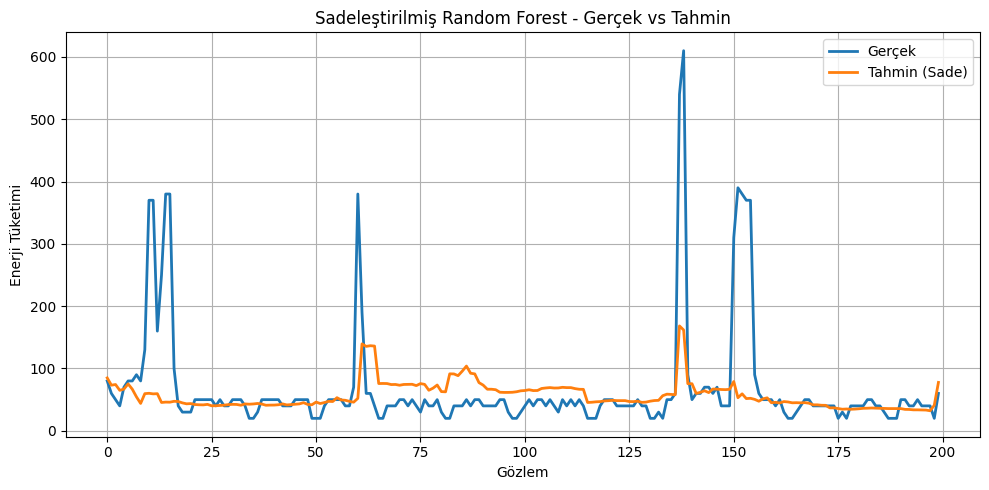

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(y_val.values[:200], label="Gerçek", linewidth=2)
plt.plot(y_pred_sade[:200], label="Tahmin (Sade)", linewidth=2)
plt.title("Sadeleştirilmiş Random Forest - Gerçek vs Tahmin")
plt.xlabel("Gözlem")
plt.ylabel("Enerji Tüketimi")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Sadelestirme ise yaramadi